<a href="https://colab.research.google.com/github/Slava-Malygina/Computer-vision-system-for-PPE-monitoring/blob/main/YOLO8_Helmet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 16.7 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Распаковываю датасет...
Содержимое распакованного датасета:
/content/helmet_dataset/YOLODataset/images/val/4287047_s_jpg.rf.jpg
/content/helmet_dataset/YOLODataset/images/val/1301229589_jpg.rf.jpg
/content/helmet_dataset/YOLODataset/images/val/00235_jpg.rf.jpg
/content/helmet_dataset/YOLODataset/images/val/1313443607_jpg.rf.jpg
/content/helmet_dataset/YOLODataset/images/val/948675786-_jpg.rf.jpg
/content/helmet_dataset/YOLODataset/labels/val/1491516161_jpg.rf.txt
/content/helmet_dataset/YOLODataset/labels/val/00004_jpg.rf.txt
/content/helmet_dataset/YOLODataset/labels/val/1313443607_jpg.rf.txt
/content/he

,№,Изображение,Каски,Люди,Статус каски,Безопасность,Макс. уверенность каски,Макс. уверенность человека
0,1,4287047_s_jpg.rf.jpg,1,1,✅ ЕСТЬ,✅ БЕЗОПАСНО,0.909,0.769
1,2,1301229589_jpg.rf.jpg,1,1,✅ ЕСТЬ,✅ БЕЗОПАСНО,0.879,0.838
2,3,00235_jpg.rf.jpg,0,4,❌ НЕТ,⚠️ НАРУШЕНИЕ,0.000,0.906
3,4,1313443607_jpg.rf.jpg,1,1,✅ ЕСТЬ,✅ БЕЗОПАСНО,0.843,0.868
4,5,948675786-_jpg.rf.jpg,1,1,✅ ЕСТЬ,✅ БЕЗОПАСНО,0.968,0.922
5,6,1398225569_jpg.rf.jpg,1,2,✅ ЕСТЬ,✅ БЕЗОПАСНО,0.922,0.912
6,7,1203370400_jpg.rf.jpg,1,1,✅ ЕСТЬ,✅ БЕЗОПАСНО,0.891,0.798
7,8,1491516161_jpg.rf.jpg,1,1,✅ ЕСТЬ,✅ БЕЗОПАСНО,0.901,0.880
8,9,1650229546_jpg.rf.jpg,3,2,✅ ЕСТЬ,✅ БЕЗОПАСНО,0.925,0.767
9,10,00129_jpg.rf.jpg,1,1,✅ ЕСТЬ,✅ БЕЗОПАСНО,0.894,0.554



СВОДНАЯ СТАТИСТИКА
Всего проанализировано изображений: 33
Изображений с касками: 29 (87.9%)
Изображений без касок: 4 (12.1%)
Потенциальных нарушений безопасности: 4 (12.1%)
Общее количество обнаруженных касок: 41
Общее количество обнаруженных людей: 58


/tmp/ipython-input-270179983.py:318: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-270179983.py:318: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


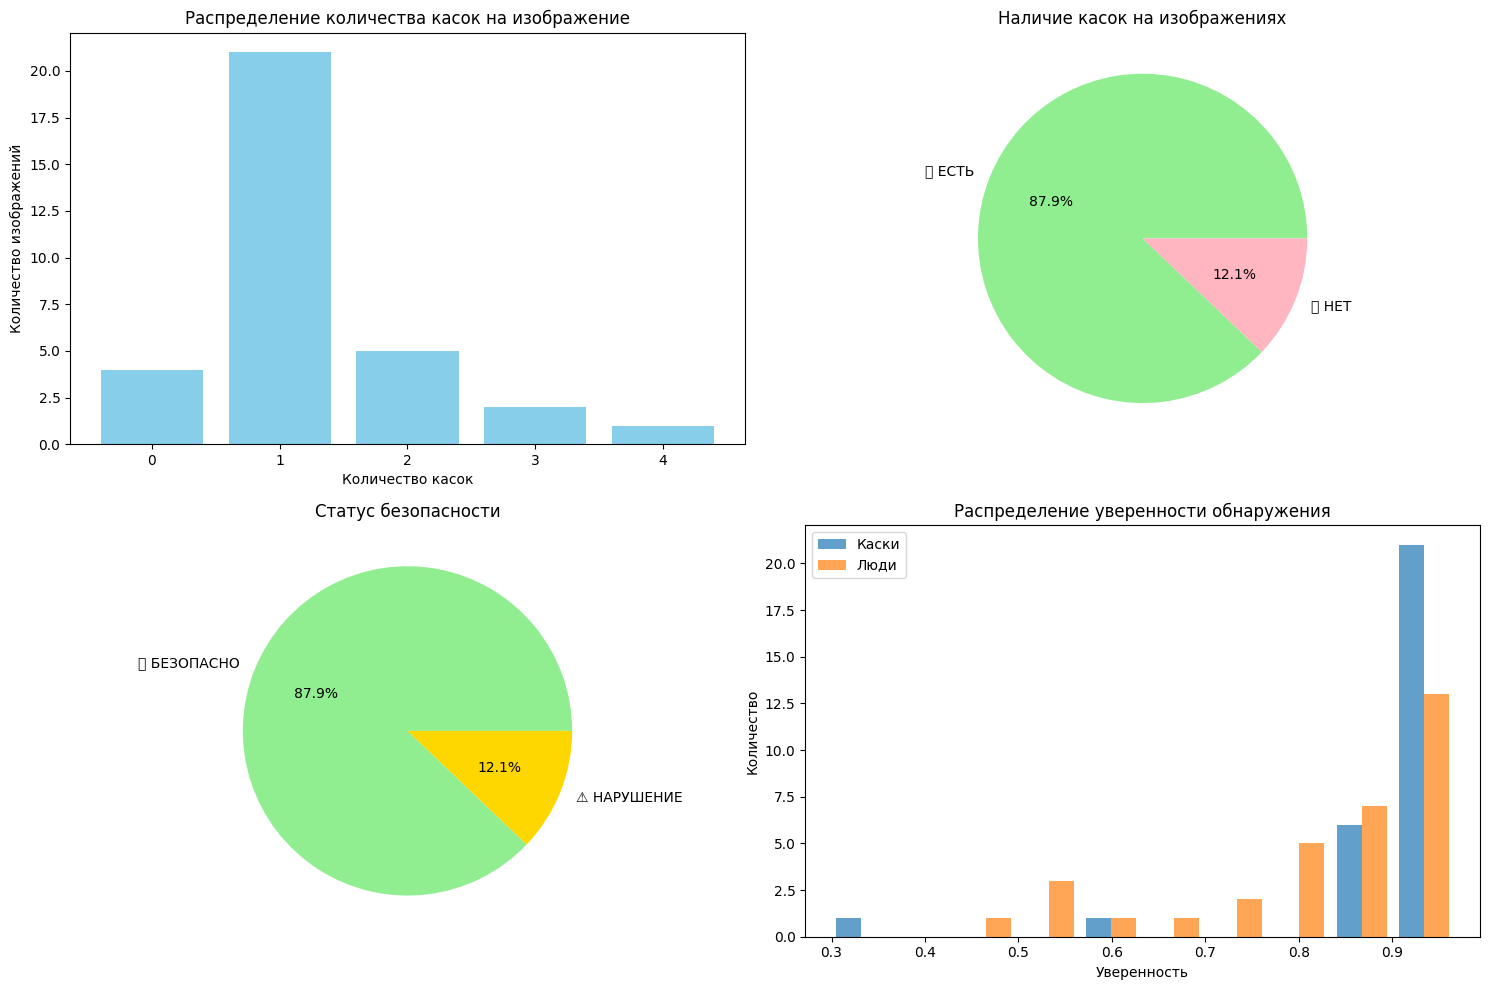


Визуализация графиков обучения...


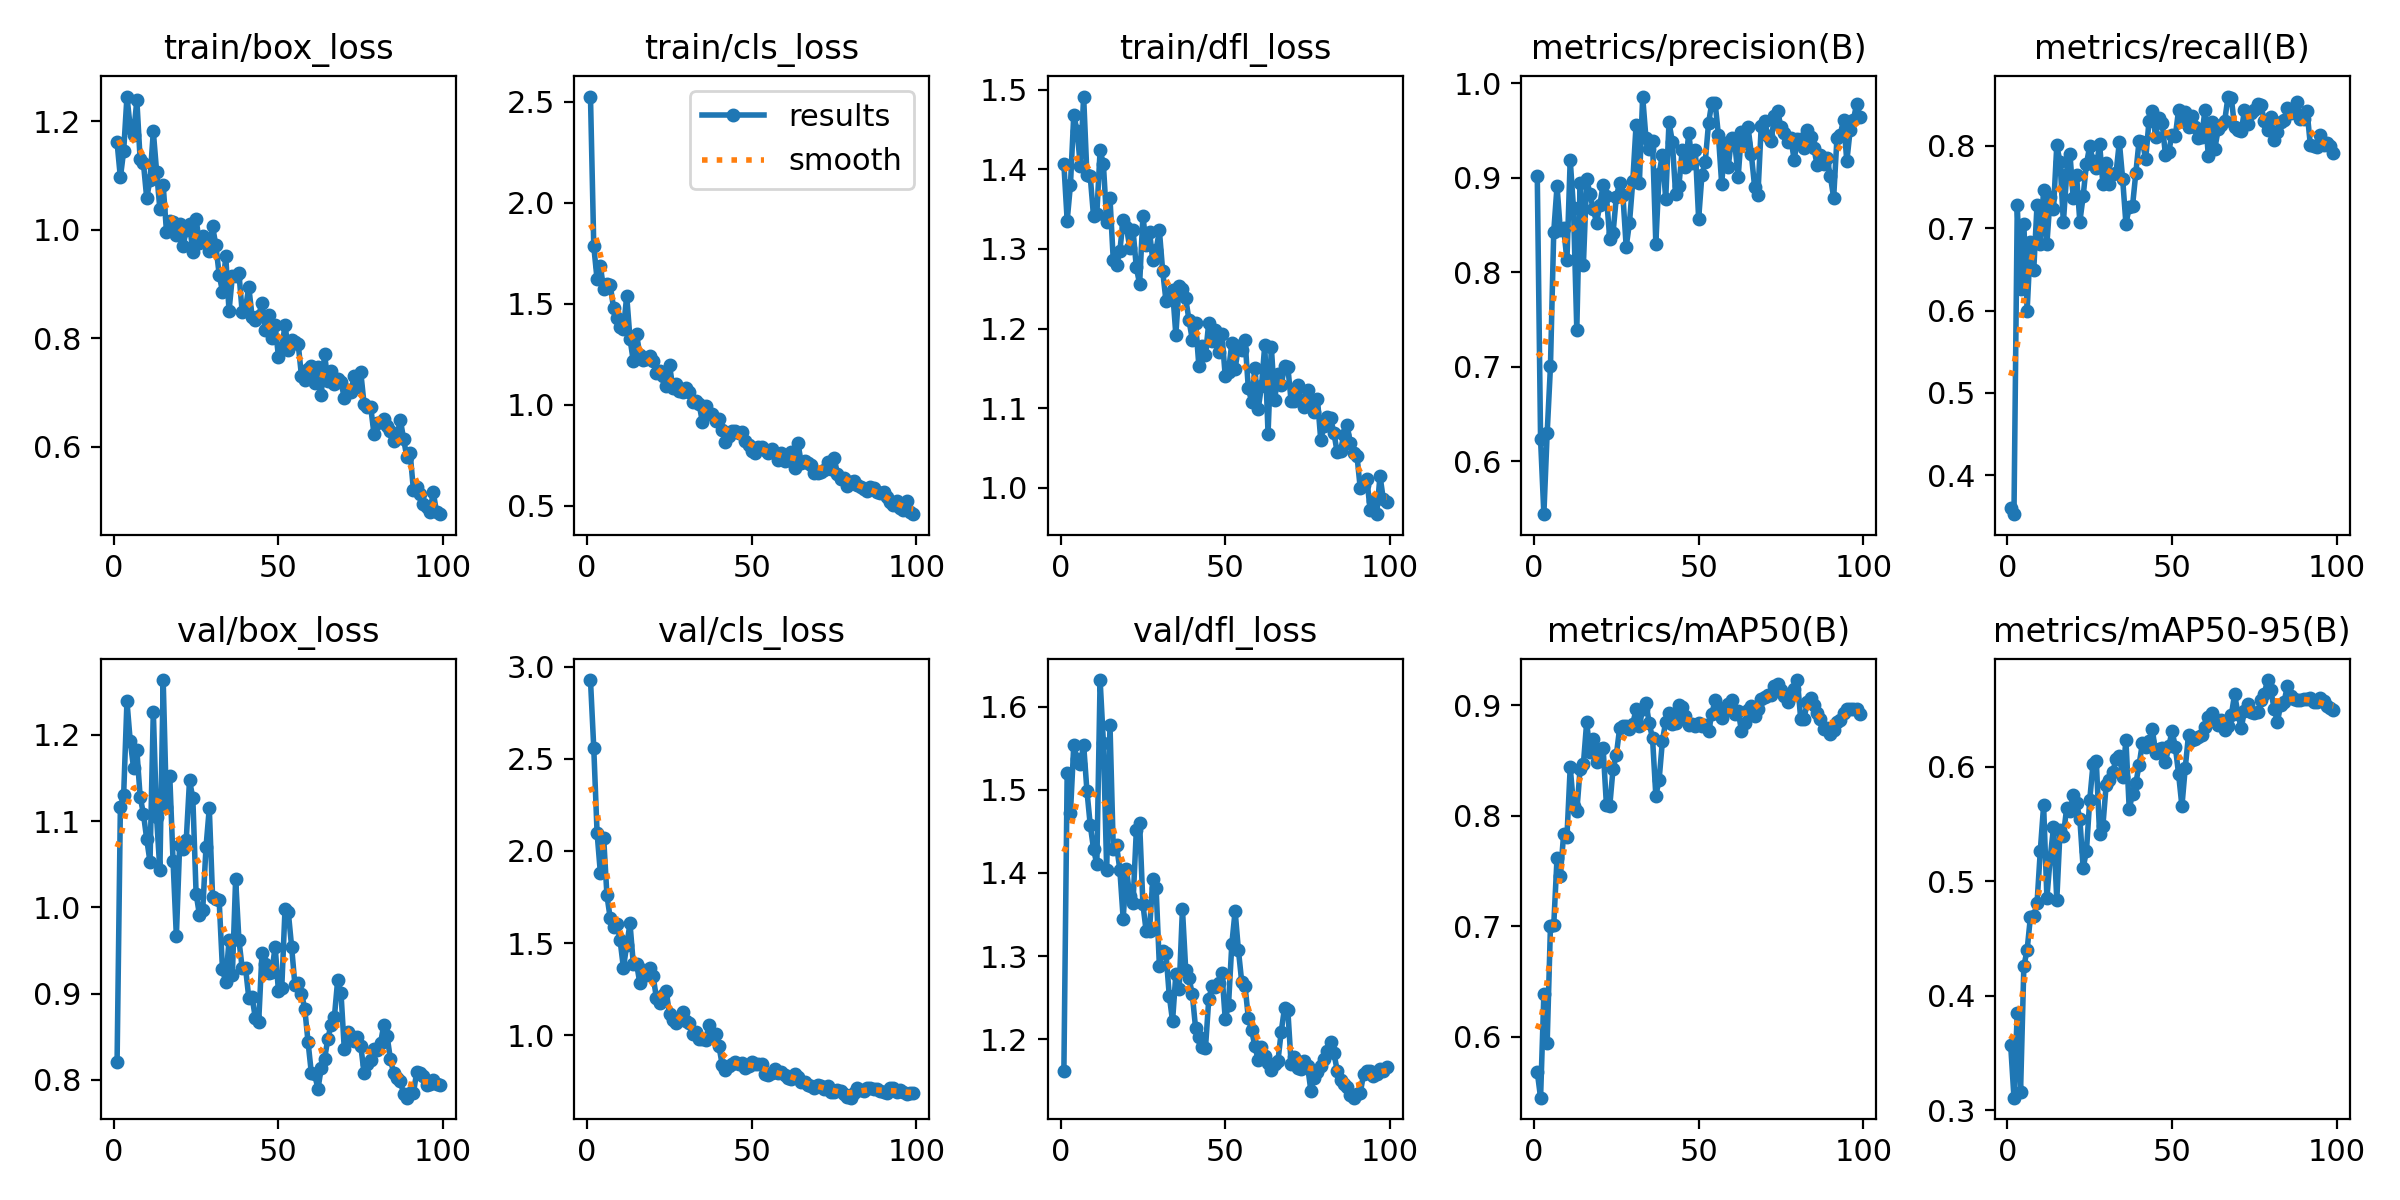

График: results.png


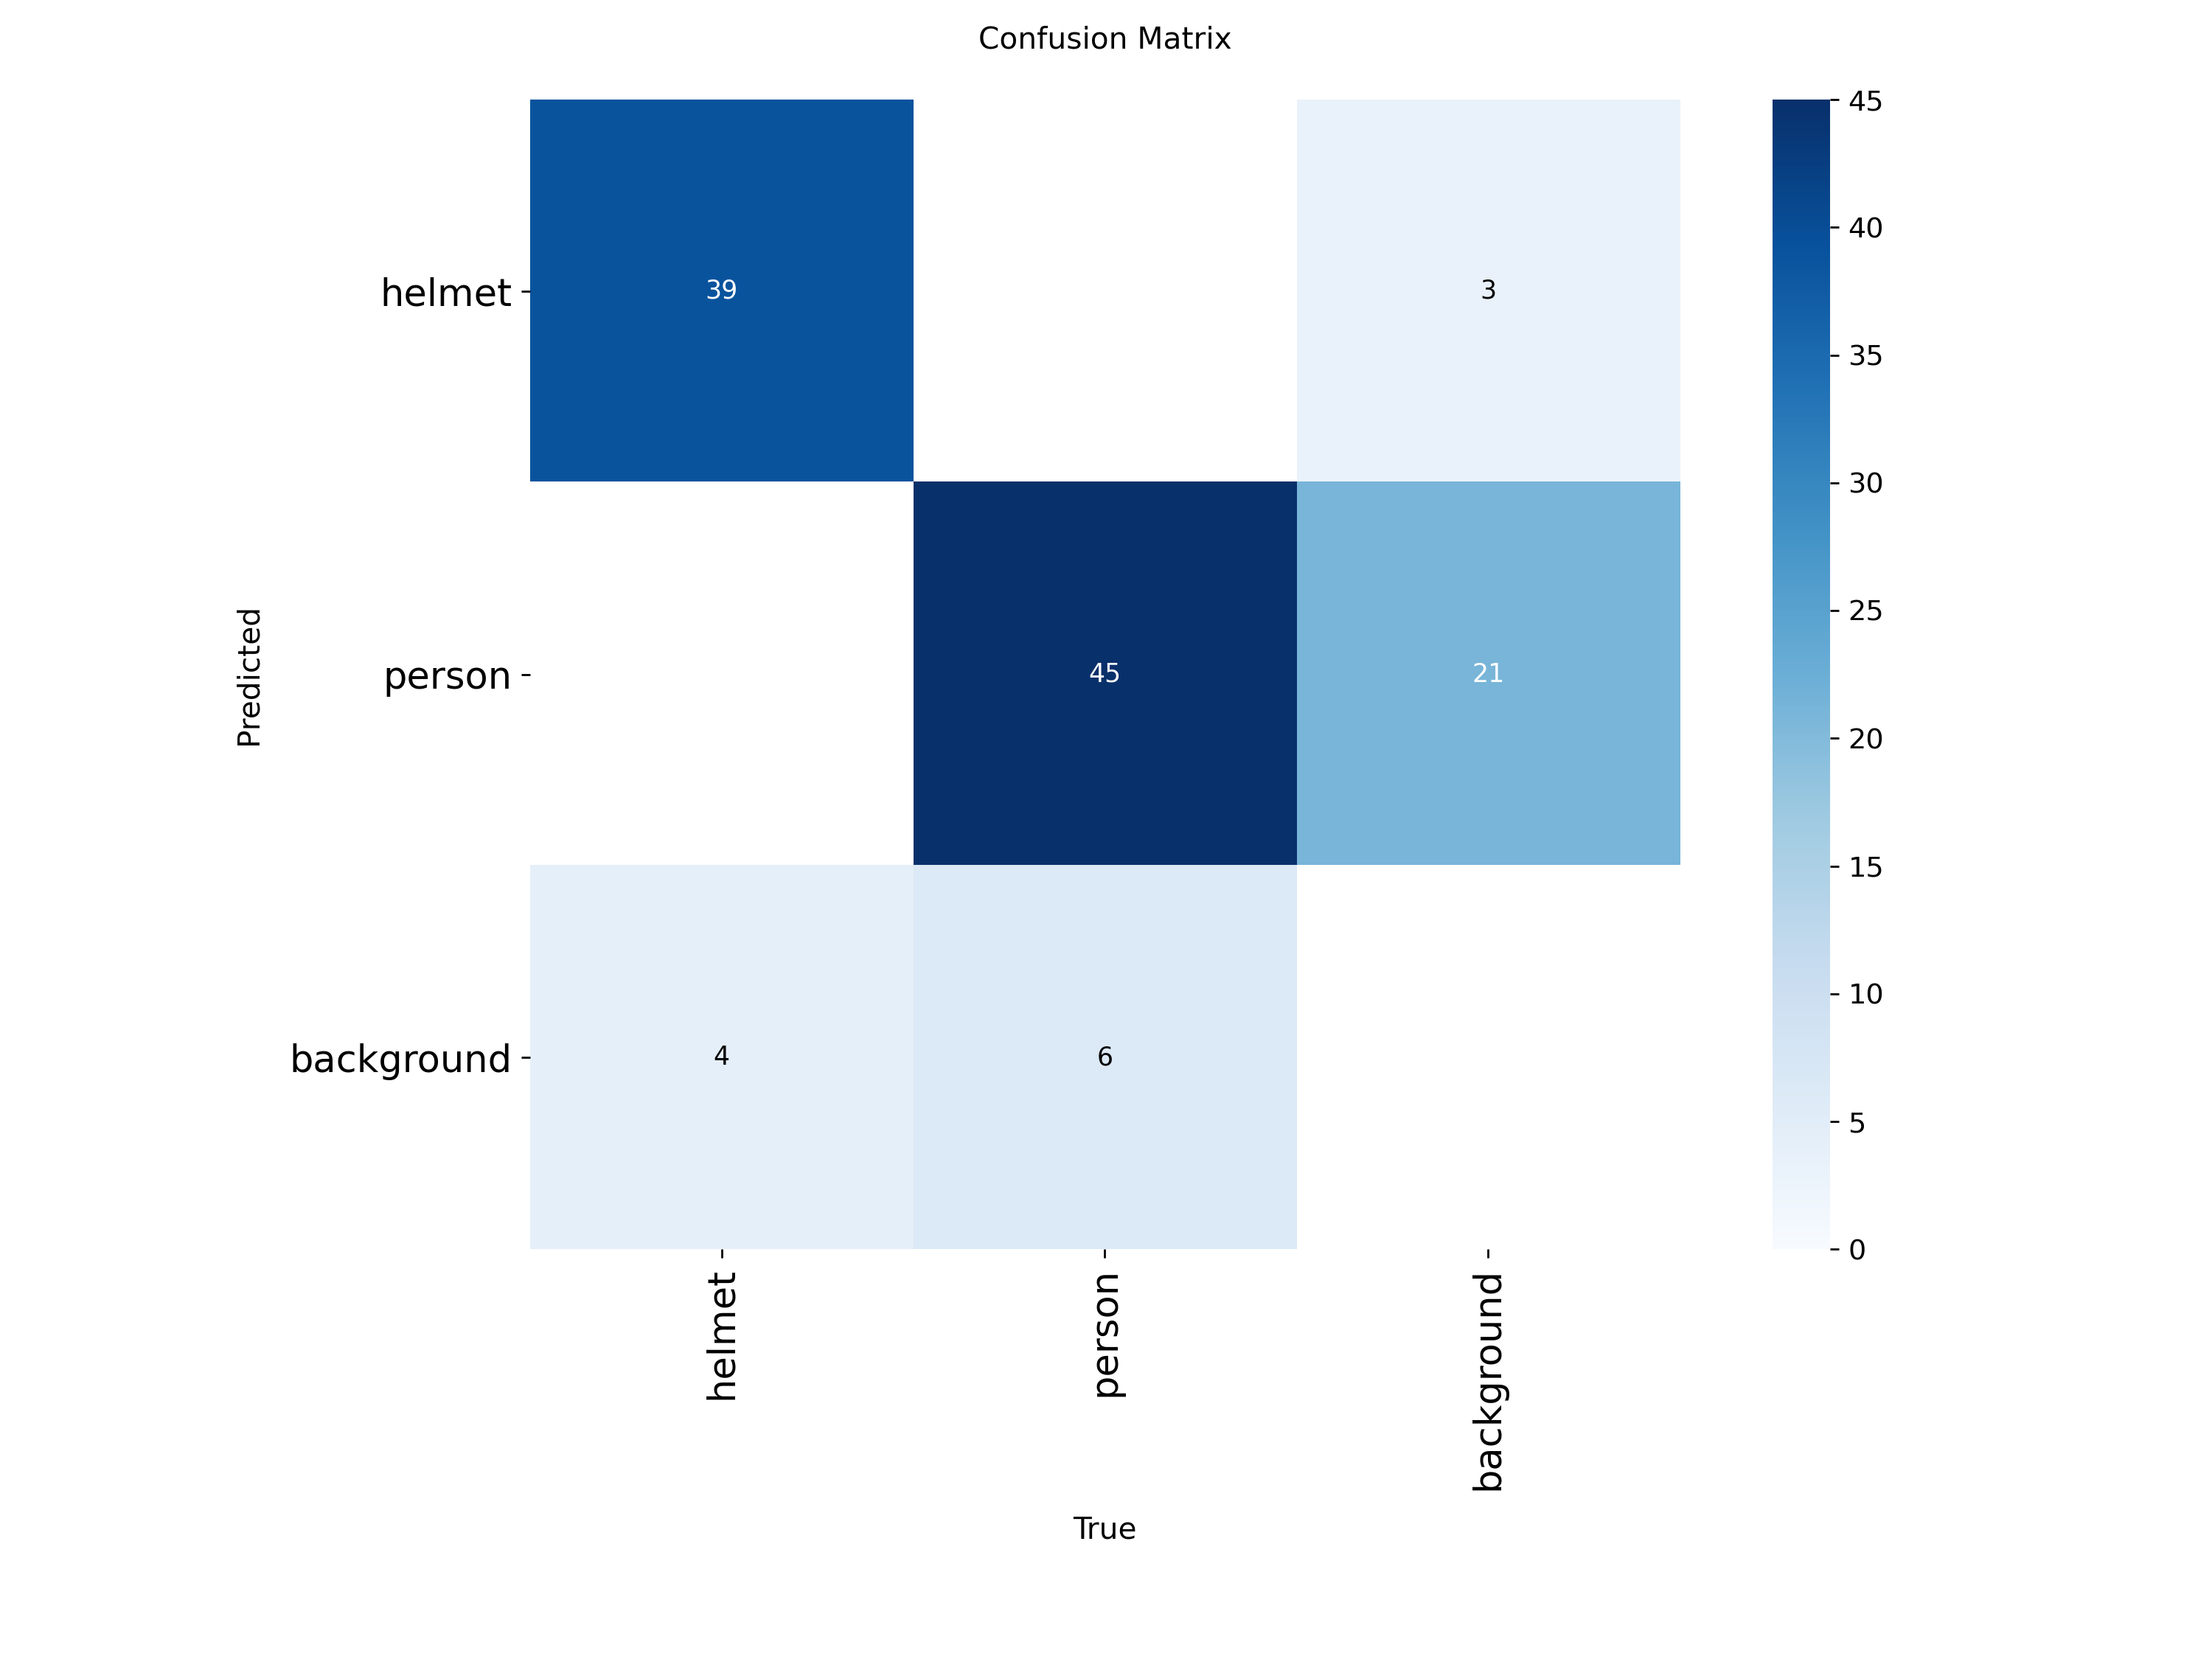

График: confusion_matrix.png
График F1_curve.png не найден
График P_curve.png не найден
График R_curve.png не найден

Сохранение результатов...
Результаты сохранены в: /content/helmet_detection_results.zip


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


ОБУЧЕНИЕ И ТЕСТИРОВАНИЕ ЗАВЕРШЕНЫ!
Размер датасета: 121 train, 33 val
Классы: 0: 'helmet', 1: 'person'
Лучшая модель: /content/runs/detect/train/weights/best.pt
Файл с результатами скачан на ваш компьютер!


In [2]:
!pip install ultralytics torch torchvision matplotlib

import torch
import os
import shutil
import zipfile
from IPython.display import Image, display
import matplotlib.pyplot as plt
import yaml
from ultralytics import YOLO
import numpy as np
import pandas as pd

zip_path = '/content/YOLODataset.zip'
dataset_path = '/content/helmet_dataset'
final_dataset_path = '/content/final_helmet_dataset'

print("Распаковываю датасет...")
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(dataset_path)

print("Содержимое распакованного датасета:")
!find {dataset_path} -type f -name "*.jpg" | head -5
!find {dataset_path} -type f -name "*.txt" | head -5

os.makedirs(f"{final_dataset_path}/images/train", exist_ok=True)
os.makedirs(f"{final_dataset_path}/images/val", exist_ok=True)
os.makedirs(f"{final_dataset_path}/labels/train", exist_ok=True)
os.makedirs(f"{final_dataset_path}/labels/val", exist_ok=True)

def organize_dataset(source_base, target_base):

    all_images = []
    all_labels = []

    for root, dirs, files in os.walk(source_base):
        for file in files:
            full_path = os.path.join(root, file)
            if file.lower().endswith(('.jpg', '.jpeg', '.png')):
                all_images.append(full_path)
            elif file.lower().endswith('.txt'):
                all_labels.append(full_path)

    print(f"Найдено изображений: {len(all_images)}")
    print(f"Найдено меток: {len(all_labels)}")

    train_images = []
    val_images = []

    for img_path in all_images:
        if 'val' in img_path.lower():
            val_images.append(img_path)
        else:
            train_images.append(img_path)

    if not val_images and len(all_images) > 0:
        split_idx = int(0.8 * len(all_images))
        train_images = all_images[:split_idx]
        val_images = all_images[split_idx:]
        print("Разделили данные автоматически 80/20")

    print(f"Train images: {len(train_images)}")
    print(f"Val images: {len(val_images)}")

    for img_path in train_images:
        shutil.copy(img_path, f"{target_base}/images/train/")

    for img_path in val_images:
        shutil.copy(img_path, f"{target_base}/images/val/")

    for img_path in train_images:
        base_name = os.path.splitext(os.path.basename(img_path))[0]
        for label_path in all_labels:
            if base_name in os.path.basename(label_path):
                shutil.copy(label_path, f"{target_base}/labels/train/")
                break

    for img_path in val_images:
        base_name = os.path.splitext(os.path.basename(img_path))[0]
        for label_path in all_labels:
            if base_name in os.path.basename(label_path):
                shutil.copy(label_path, f"{target_base}/labels/val/")
                break

organize_dataset(dataset_path, final_dataset_path)

print(f"\nФинальная структура датасета:")
print(f"Train images: {len(os.listdir(f'{final_dataset_path}/images/train'))}")
print(f"Val images: {len(os.listdir(f'{final_dataset_path}/images/val'))}")
print(f"Train labels: {len(os.listdir(f'{final_dataset_path}/labels/train'))}")
print(f"Val labels: {len(os.listdir(f'{final_dataset_path}/labels/val'))}")

yaml_content = f"""
path: {final_dataset_path}
train: images/train
val: images/val
nc: 2
names:
  0: helmet
  1: person
"""

yaml_path = f'{final_dataset_path}/dataset.yaml'
with open(yaml_path, 'w') as f:
    f.write(yaml_content)

print(f"\nYAML файл создан: {yaml_path}")

model = YOLO('yolov8n.pt')
print("Модель YOLOv8n загружена!")

print("Начинаем обучение на CPU...")

results = model.train(
    data=yaml_path,
    epochs=100,
    imgsz=640,
    batch=4,
    lr0=0.001,
    patience=20,
    save=True,
    device='cpu',
    workers=0,
    val=True,
    plots=True,
    seed=42,
    augment=True,
    verbose=True
)

print("Обучение завершено!")


print("\nОцениваю модель...")

best_model_path = '/content/runs/detect/train/weights/best.pt'
if os.path.exists(best_model_path):
    best_model = YOLO(best_model_path)

    metrics = best_model.val(device='cpu')
    print("\n" + "="*50)
    print("МЕТРИКИ КАЧЕСТВА МОДЕЛИ")
    print("="*50)
    print(f"mAP@0.5: {metrics.box.map:.4f}")
    print(f"mAP@0.5:0.95: {metrics.box.map50:.4f}")
    print(f"Precision: {metrics.box.mp:.4f}")
    print(f"Recall: {metrics.box.mr:.4f}")
    print("="*50)
else:
    print("Лучшая модель не найдена!")
    best_model_path = '/content/runs/detect/train/weights/last.pt'
    if os.path.exists(best_model_path):
        best_model = YOLO(best_model_path)
        print("Использую последнюю модель вместо лучшей")

print("\n" + "="*60)
print("АНАЛИЗ ВСЕХ ВАЛИДАЦИОННЫХ ИЗОБРАЖЕНИЙ")
print("="*60)

val_images_dir = f"{final_dataset_path}/images/val"

if os.path.exists(val_images_dir):
    val_images = [f for f in os.listdir(val_images_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    print(f"Найдено валидационных изображений: {len(val_images)}")

    results_data = []

    for i, img_name in enumerate(val_images):
        img_path = os.path.join(val_images_dir, img_name)

        results = best_model.predict(
            source=img_path,
            conf=0.15,
            iou=0.4,
            device='cpu',
            verbose=False
        )

        helmets_found = 0
        persons_found = 0
        max_helmet_conf = 0
        max_person_conf = 0

        for r in results:
            boxes = r.boxes
            if boxes is not None and len(boxes) > 0:
                for box in boxes:
                    cls = int(box.cls)
                    conf = float(box.conf)
                    if cls == 0:  # helmet
                        helmets_found += 1
                        max_helmet_conf = max(max_helmet_conf, conf)
                    elif cls == 1:  # person
                        persons_found += 1
                        max_person_conf = max(max_person_conf, conf)

        if helmets_found > 0:
            status = "✅ ЕСТЬ"
            status_color = "green"
        else:
            status = "❌ НЕТ"
            status_color = "red"

        if helmets_found > 0 and persons_found > 0:
            safety = "✅ БЕЗОПАСНО"
        elif helmets_found == 0 and persons_found > 0:
            safety = "⚠️ НАРУШЕНИЕ"
        else:
            safety = "➖ НЕТ ДАННЫХ"

        results_data.append({
            '№': i + 1,
            'Изображение': img_name,
            'Каски': helmets_found,
            'Люди': persons_found,
            'Статус каски': status,
            'Безопасность': safety,
            'Макс. уверенность каски': f"{max_helmet_conf:.3f}" if max_helmet_conf > 0 else "0.000",
            'Макс. уверенность человека': f"{max_person_conf:.3f}" if max_person_conf > 0 else "0.000"
        })

        if (i + 1) % 5 == 0 or (i + 1) == len(val_images):
            print(f"Обработано {i + 1}/{len(val_images)} изображений...")

    df = pd.DataFrame(results_data)

    print("\n" + "="*80)
    print("ТАБЛИЦА РЕЗУЛЬТАТОВ АНАЛИЗА КАСОК")
    print("="*80)

    styled_df = df.style\
        .applymap(lambda x: 'background-color: #90EE90' if x == '✅ ЕСТЬ' else '', subset=['Статус каски'])\
        .applymap(lambda x: 'background-color: #FFB6C1' if x == '❌ НЕТ' else '', subset=['Статус каски'])\
        .applymap(lambda x: 'background-color: #90EE90' if x == '✅ БЕЗОПАСНО' else '', subset=['Безопасность'])\
        .applymap(lambda x: 'background-color: #FFD700' if x == '⚠️ НАРУШЕНИЕ' else '', subset=['Безопасность'])\
        .set_properties(**{'text-align': 'center'})

    display(styled_df)

    print("\n" + "="*80)
    print("СВОДНАЯ СТАТИСТИКА")
    print("="*80)

    total_images = len(df)
    images_with_helmets = len(df[df['Каски'] > 0])
    images_without_helmets = len(df[df['Каски'] == 0])
    violations = len(df[(df['Каски'] == 0) & (df['Люди'] > 0)])

    print(f"Всего проанализировано изображений: {total_images}")
    print(f"Изображений с касками: {images_with_helmets} ({images_with_helmets/total_images*100:.1f}%)")
    print(f"Изображений без касок: {images_without_helmets} ({images_without_helmets/total_images*100:.1f}%)")
    print(f"Потенциальных нарушений безопасности: {violations} ({violations/total_images*100:.1f}%)")
    print(f"Общее количество обнаруженных касок: {df['Каски'].sum()}")
    print(f"Общее количество обнаруженных людей: {df['Люди'].sum()}")

    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

    helmet_dist = df['Каски'].value_counts().sort_index()
    ax1.bar(helmet_dist.index.astype(str), helmet_dist.values, color='skyblue')
    ax1.set_title('Распределение количества касок на изображение')
    ax1.set_xlabel('Количество касок')
    ax1.set_ylabel('Количество изображений')

    status_counts = df['Статус каски'].value_counts()
    colors = ['#90EE90' if status == '✅ ЕСТЬ' else '#FFB6C1' for status in status_counts.index]
    ax2.pie(status_counts.values, labels=status_counts.index, autopct='%1.1f%%', colors=colors)
    ax2.set_title('Наличие касок на изображениях')

    safety_counts = df['Безопасность'].value_counts()
    colors = ['#90EE90' if safety == '✅ БЕЗОПАСНО' else '#FFD700' if safety == '⚠️ НАРУШЕНИЕ' else 'lightgray' for safety in safety_counts.index]
    ax3.pie(safety_counts.values, labels=safety_counts.index, autopct='%1.1f%%', colors=colors)
    ax3.set_title('Статус безопасности')

    helmet_confs = pd.to_numeric(df['Макс. уверенность каски'])
    person_confs = pd.to_numeric(df['Макс. уверенность человека'])
    ax4.hist([helmet_confs[helmet_confs > 0], person_confs[person_confs > 0]],
             bins=10, alpha=0.7, label=['Каски', 'Люди'])
    ax4.set_title('Распределение уверенности обнаружения')
    ax4.set_xlabel('Уверенность')
    ax4.set_ylabel('Количество')
    ax4.legend()

    plt.tight_layout()
    plt.show()

else:
    print("Папка с валидационными изображениями не найдена!")

print("\nВизуализация графиков обучения...")

plots_path = '/content/runs/detect/train'
plot_files = ['results.png', 'confusion_matrix.png', 'F1_curve.png', 'P_curve.png', 'R_curve.png']

found_plots = False
for plot_file in plot_files:
    plot_path = os.path.join(plots_path, plot_file)
    if os.path.exists(plot_path):
        display(Image(filename=plot_path, width=800))
        print(f"График: {plot_file}")
        found_plots = True
    else:
        print(f"График {plot_file} не найден")

print("\nСохранение результатов...")

import zipfile

output_zip = '/content/helmet_detection_results.zip'
with zipfile.ZipFile(output_zip, 'w') as zipf:
    if os.path.exists(best_model_path):
        zipf.write(best_model_path, 'best_helmet_model.pt')

    for plot_file in plot_files:
        plot_path = os.path.join(plots_path, plot_file)
        if os.path.exists(plot_path):
            zipf.write(plot_path, f'plots/{plot_file}')

    zipf.write(yaml_path, 'dataset.yaml')

print(f"Результаты сохранены в: {output_zip}")

from google.colab import files
files.download(output_zip)

print("\n" + "="*60)
print("ОБУЧЕНИЕ И ТЕСТИРОВАНИЕ ЗАВЕРШЕНЫ!")
print("="*60)
print(f"Размер датасета: {len(os.listdir(f'{final_dataset_path}/images/train'))} train, {len(os.listdir(f'{final_dataset_path}/images/val'))} val")
print("Классы: 0: 'helmet', 1: 'person'")
print(f"Лучшая модель: {best_model_path}")
print("Файл с результатами скачан на ваш компьютер!")